In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import scipy

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
plt.style.use('seaborn-whitegrid')

In [3]:
cars = pd.read_csv('mtcars.csv', header=0)
cars.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [4]:
cars.rename(columns=({'Unnamed: 0': 'car_names'}), inplace=True)
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


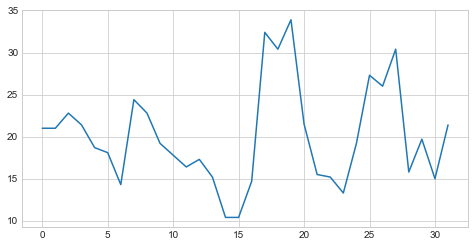

In [5]:
mpg = cars.mpg
plt.plot(mpg)

In [6]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


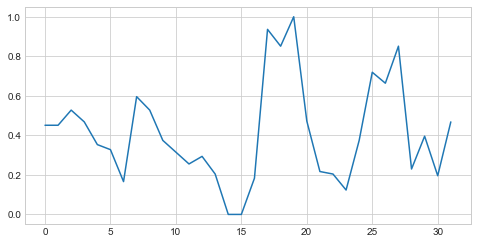

In [7]:
mpg_matrix = mpg.values.reshape(-1, 1)

scaled = preprocessing.MinMaxScaler()

scales_mpg = scaled.fit_transform(mpg_matrix)

plt.plot(scales_mpg)

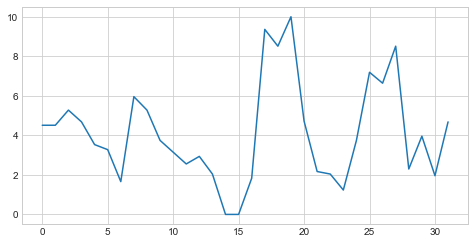

In [8]:
mpg_matrix = mpg.values.reshape(-1, 1)

scaled = preprocessing.MinMaxScaler(feature_range=(0, 10))

scales_mpg = scaled.fit_transform(mpg_matrix)

plt.plot(scales_mpg)

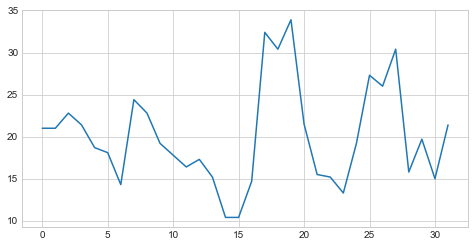

In [9]:
standardize_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardize_mpg)

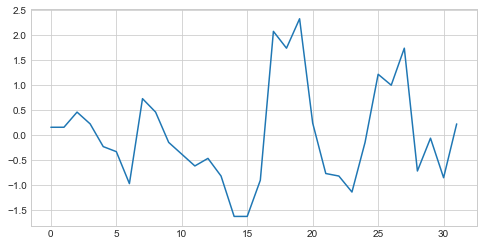

In [10]:
standardize_mpg = scale(mpg)
plt.plot(standardize_mpg)

In [11]:
# Extreme value analysis for outliers

df = pd.read_csv('iris.data.csv', header=None, sep=',')
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[]

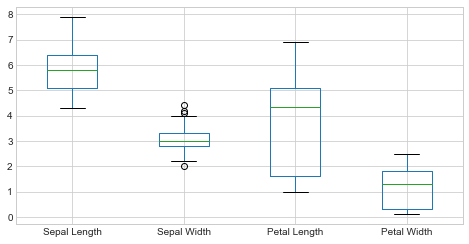

In [12]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

df.boxplot(return_type='dict')
plt.plot()

In [13]:
Sepal_Width = x[:,1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [14]:
Sepal_Width = x[:,1]
iris_outliers = (Sepal_Width < 2.05)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


In [15]:
# Applying Tukey outlier labelling

pd.options.display.float_format = '{:0.1f}'.format
x_df = pd.DataFrame(x)
print(x_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


<AxesSubplot:xlabel='Species', ylabel='Sepal Length'>

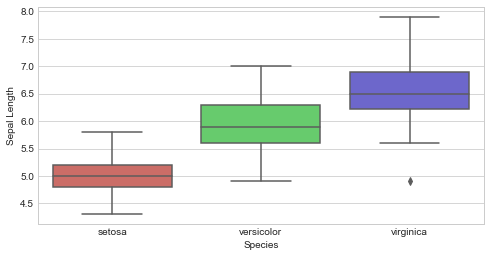

In [17]:
# Multivariate analysis for outliers

data = df.iloc[:, 0:4].values
target = df.iloc[:, 4].values

sns.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

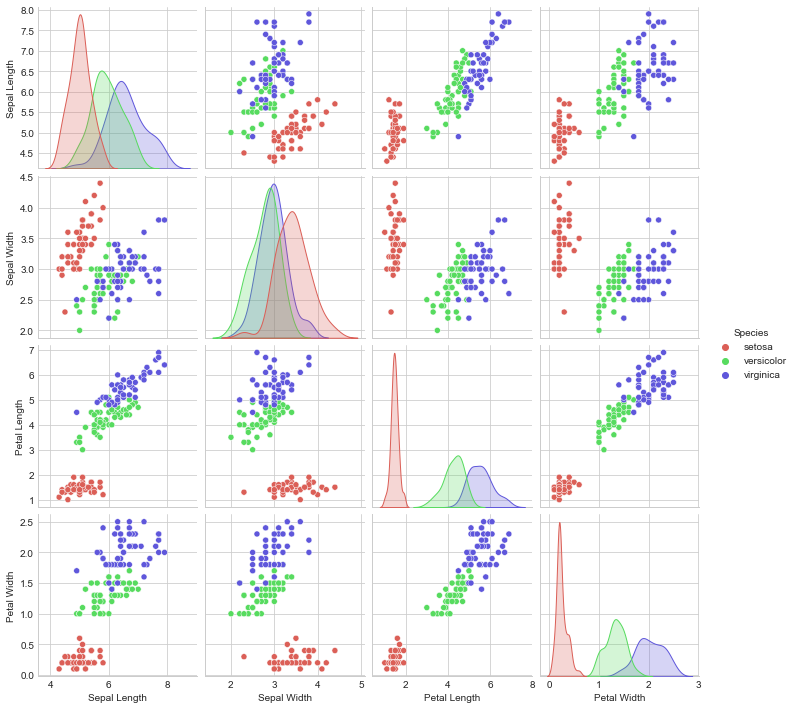

In [19]:
sns.pairplot(df, hue='Species', palette='hls')